In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_theme(style = 'whitegrid')
#sns.set_palette('coolwarm')
import matplotlib.pyplot as plt
from itertools import product

In [2]:
df = pd.read_csv('main_data.csv')
df.head()

,Unnamed: 0,country,year,protest,protesterviolence,protest_time,reasons_social,reasons_policebrutality,reasons_other,reasons_land,reasons_political,reasons_labor,reasons_price,reasons_removal,responses_accomodation,responses_arrests,responses_shootings,responses_other,responses_crowd_dispersal,responses_beatings,responses_killings,responses_ignore,violent_response,success,violence_both,violent_protest_time
0,13647,Afghanistan,1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13648,Afghanistan,1991,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,13649,Afghanistan,1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13650,Afghanistan,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13651,Afghanistan,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_clean = df[['protest', 'protesterviolence', 'reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal',
         'reasons_political', 'reasons_price', 'reasons_policebrutality']]
df_clean.head()

,protest,protesterviolence,reasons_labor,reasons_social,reasons_land,reasons_removal,reasons_political,reasons_price,reasons_policebrutality
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [4]:
# Creating list for iterable and names for new df
reasons = ['reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal', 'reasons_political',
           'reasons_price', 'reasons_policebrutality']
# Initializing empty df
df_temp = pd.DataFrame()

In [5]:
# Calculates the total protests and total violent protests for each reason
for reason in reasons:
    df_temp[reason + '_total'] = [sum(df_clean[reason])]
    df_temp['violent_' + reason] = [sum(df_clean['protesterviolence'] & df_clean[reason] > 0)]
    
df_temp.head()

,reasons_labor_total,violent_reasons_labor,reasons_social_total,violent_reasons_social,reasons_land_total,violent_reasons_land,reasons_removal_total,violent_reasons_removal,reasons_political_total,violent_reasons_political,reasons_price_total,violent_reasons_price,reasons_policebrutality_total,violent_reasons_policebrutality
0,2211,518,684,103,582,165,1889,550,10750,2807,1414,474,1101,452


In [6]:
['social reforms', 'police brutality', 'property', 'law & politics', 'labor rights','inflation', 'anti-authoritarian']

['social reforms',
 'police brutality',
 'property',
 'law & politics',
 'labor rights',
 'inflation',
 'anti-authoritarian']

In [7]:
# Formatting
df_reasons = pd.DataFrame(columns = ['Reason', 'Total Protests', 'Violent Protests'])
df_reasons['Reason'] = ['labor rights', 'social reforms', 'property', 'anti-authoritarian', 'law & politics', 'inflation', 'police brutality']
df_reasons['Total Protests'] = [2211, 684, 582, 1889, 10750, 1414, 1101]
df_reasons['Violent Protests'] = [518, 103, 165, 550, 2807, 474, 452]
df_reasons['Nonviolent Protests'] = df_reasons['Total Protests'] - df_reasons['Violent Protests']
df_reasons

,Reason,Total Protests,Violent Protests,Nonviolent Protests
0,labor rights,2211,518,1693
1,social reforms,684,103,581
2,property,582,165,417
3,anti-authoritarian,1889,550,1339
4,law & politics,10750,2807,7943
5,inflation,1414,474,940
6,police brutality,1101,452,649


In [8]:
total_violent = df_reasons['Violent Protests'].sum()
total_nonviolent = df_reasons['Nonviolent Protests'].sum()

In [9]:
# Calculates the percentage for violent and nonviolent protests
for i in df_reasons.iterrows():
    df_reasons['Violent'] = round((df_reasons['Violent Protests']/df_reasons['Total Protests'])*100)
    df_reasons['Nonviolent'] = round((df_reasons['Nonviolent Protests']/df_reasons['Total Protests'])*100)
df_reasons.head()

,Reason,Total Protests,Violent Protests,Nonviolent Protests,Violent,Nonviolent
0,labor rights,2211,518,1693,23.0,77.0
1,social reforms,684,103,581,15.0,85.0
2,property,582,165,417,28.0,72.0
3,anti-authoritarian,1889,550,1339,29.0,71.0
4,law & politics,10750,2807,7943,26.0,74.0


In [10]:
df_per = df_reasons.drop(['Total Protests', 'Violent Protests', 'Nonviolent Protests', 'Nonviolent'], axis = 1)
df_per = df_per.sort_values(['Violent'])

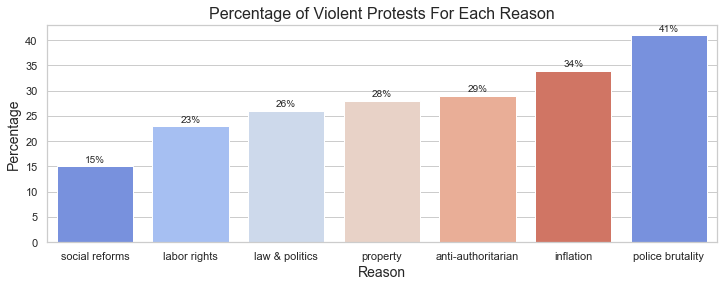

In [11]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize = fig_dims)

# Plotting
palette = sns.color_palette('coolwarm')

violence_plot = sns.barplot(x = 'Reason', y = 'Violent', data = df_per, ax = ax, palette = palette)

for p in violence_plot.patches:
    height = int(p.get_height())
    ax.annotate('{}'.format(height) + '%', xy = (p.get_x() + p.get_width() / 2, height), xytext = (0, 2), 
                textcoords = 'offset points', ha = 'center', va = 'bottom')
                           
plt.xlabel('Reason', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Percentage of Violent Protests For Each Reason', size = 16)

None

In [12]:
# Calculates the percentage for violent and nonviolent protests
#for i in df_reasons.iterrows():
#    df_reasons['Violent'] = round((df_reasons['Violent Protests']/total_violent)*100)
#    df_reasons['Nonviolent'] = round((df_reasons['Nonviolent Protests']/total_nonviolent)*100)
#df_reasons.head()

In [13]:
# Setup for first plot
temp = df_reasons[['Reason', 'Nonviolent Protests', 'Violent Protests']]
melted = pd.melt(temp, id_vars='Reason').rename(columns = str.title)
melted = melted.sort_values(['Value','Variable'])
melted

,Reason,Variable,Value
8,social reforms,Violent Protests,103
9,property,Violent Protests,165
2,property,Nonviolent Protests,417
13,police brutality,Violent Protests,452
12,inflation,Violent Protests,474
7,labor rights,Violent Protests,518
10,anti-authoritarian,Violent Protests,550
1,social reforms,Nonviolent Protests,581
6,police brutality,Nonviolent Protests,649
5,inflation,Nonviolent Protests,940


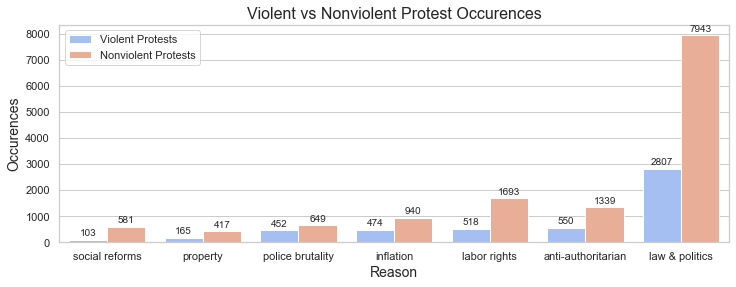

In [14]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
sns.set_palette('coolwarm')
palette ={"Violent Protests": "C1", "Nonviolent Protests": "C10"}

violence_plot = sns.barplot(x = 'Reason', y = 'Value', hue = 'Variable', data = melted, ax = ax, palette = palette)

for p in violence_plot.patches:
    height = int(p.get_height())
    ax.annotate('{}'.format(height), xy = (p.get_x() + p.get_width() / 2, height), xytext = (0, 2), 
                textcoords = 'offset points', ha = 'center', va = 'bottom')
                           
plt.gca().legend().set_title('')
plt.xlabel('Reason', size = 14)
plt.ylabel('Occurences', size = 14)
plt.title('Violent vs Nonviolent Protest Occurences', size = 16)

None

In [15]:
# Setup for second plot
temp2 = df_reasons[['Reason', 'Nonviolent', 'Violent']]
melted2 = pd.melt(temp2, id_vars='Reason', value_name = 'Percentage').rename(columns = str.title)
melted2 = melted2.sort_values(['Percentage','Variable'])
melted2

,Reason,Variable,Percentage
8,social reforms,Violent,15.0
7,labor rights,Violent,23.0
11,law & politics,Violent,26.0
9,property,Violent,28.0
10,anti-authoritarian,Violent,29.0
12,inflation,Violent,34.0
13,police brutality,Violent,41.0
6,police brutality,Nonviolent,59.0
5,inflation,Nonviolent,66.0
3,anti-authoritarian,Nonviolent,71.0


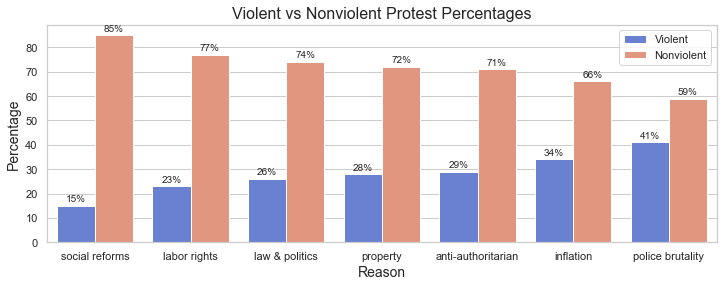

In [16]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
palette ={"Violent": "#5977e3", "Nonviolent": "#f18d6f"}

violence_plot = sns.barplot(x = 'Reason', y = 'Percentage', hue = 'Variable', data = melted2, ax = ax, palette = palette)


for p in violence_plot.patches:
    height = int(p.get_height())
    ax.annotate('{}'.format(height) + '%', xy = (p.get_x() + p.get_width() / 2, height), xytext = (0, 2), 
                textcoords = 'offset points', ha = 'center', va = 'bottom')
                           
plt.gca().legend().set_title('')
plt.xlabel('Reason', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Violent vs Nonviolent Protest Percentages', size = 16)

None

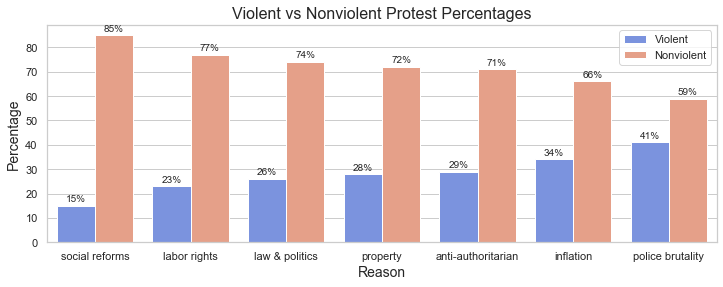

In [17]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
palette ={"Violent": "#6a8bef", "Nonviolent": "#f4987a"}

violence_plot = sns.barplot(x = 'Reason', y = 'Percentage', hue = 'Variable', data = melted2, ax = ax, palette = palette)


for p in violence_plot.patches:
    height = int(p.get_height())
    ax.annotate('{}'.format(height) + '%', xy = (p.get_x() + p.get_width() / 2, height), xytext = (0, 2), 
                textcoords = 'offset points', ha = 'center', va = 'bottom')
                           
plt.gca().legend().set_title('')
plt.xlabel('Reason', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Violent vs Nonviolent Protest Percentages', size = 16)

None

In [18]:
color = plt.cm.coolwarm([0.1, 0.15, 0.25, 0.75])

In [19]:
print(color)

[[0.34832334 0.46571115 0.88834616 1.        ]
 [0.4148009  0.54687353 0.93908753 1.        ]
 [0.55431187 0.69009701 0.99551555 1.        ]
 [0.95665321 0.59803382 0.47730229 1.        ]]


In [20]:
from matplotlib.colors import rgb2hex

[ rgb2hex(color[i,:]) for i in range(color.shape[0]) ]

['#5977e3', '#6a8bef', '#8db0fe', '#f4987a']

In [21]:
palette = sns.color_palette('coolwarm')

In [22]:
print(palette)

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941), (0.603162067917647, 0.7315274773529412, 0.9995652785372549), (0.7867207013568628, 0.8448072103686275, 0.9398103849490196), (0.9306685963333333, 0.818876999654902, 0.7591463906980392), (0.9673165156666667, 0.6574708288078431, 0.5381601507294118), (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]
